# Genome Size Vs Complexity

### Imports

In [1]:
from logic_gates import run_evo, Circuit
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, Counter
from tqdm.notebook import tqdm

Setting up some utility functions and an object to track isomorphisms

In [2]:
def construct_genome(size: int) -> list:
    genome = []
    for i in range(size):
        genome += [0, 1]
    genome += [2]
    return genome

class IsomorphismCounter:

    def __init__(self):
        self.counter = defaultdict(Counter)

    def add(self, network, size: int):
        for key in self.counter:
            if key.is_isomorphic(network, pruned=True):
                self.counter[key][size] += 1
                self.counter[key]["total"] += 1
                return key
        self.counter[network][size] += 1
        self.counter[network]["total"] += 1
        return network

    def get_networks(self):
        return self.counter.keys()

    def get_number_by_size(self, size: int):
        return {key: value[size] for key, value in self.counter.items()}

    def get_number_networks_total(self):
        return {key: value['total'] for key, value in self.counter.items()}

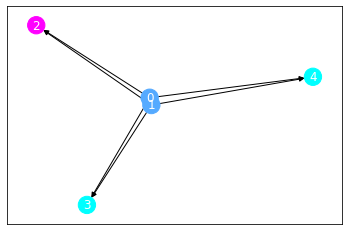

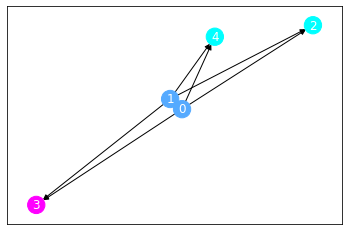

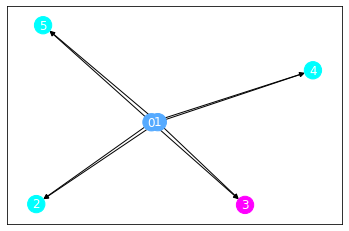

In [3]:
circuit1 = Circuit(2, [0, 1, 0, 1, 0, 1, 2])
circuit1.plot_network()
plt.show()
circuit2 = Circuit(2, [0, 1, 0, 1, 0, 1, 3])
circuit2.plot_network()
plt.show()
circuit3 = Circuit(2, [0, 1, 0, 1, 0, 1, 0, 1, 3])
circuit3.plot_network()
plt.show()

In [4]:
testCounter = IsomorphismCounter()
testCounter.add(circuit1, 3)
testCounter.add(circuit2, 3)
testCounter.add(circuit3, 4)
testCounter.get_number_by_size(3)

{[0, 1, 0, 1, 0, 1, 2]: 2}

Goal Function

In [5]:
def goal_function(x: [bool]) -> bool:
    return x[0] and x[1]

Now the actual simulation

  0%|          | 0/1000 [00:00<?, ?it/s]

Mean:4281.29
STD:5100.799173845213


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean:2724.599
STD:3740.520478783534


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean:2195.103
STD:3369.126740921303


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean:1787.878
STD:2999.4432371885287


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean:1954.278
STD:3268.9484735486426


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean:1704.759
STD:3384.7480306396515


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean:1875.662
STD:3662.315494568429


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean:1501.258
STD:3286.961309391396


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean:1678.559
STD:3623.9922859353605


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean:1565.915
STD:3646.425495711519


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean:1452.84
STD:3641.7807466128434


  0%|          | 0/1000 [00:00<?, ?it/s]

Mean:1470.758
STD:3663.9754452556035


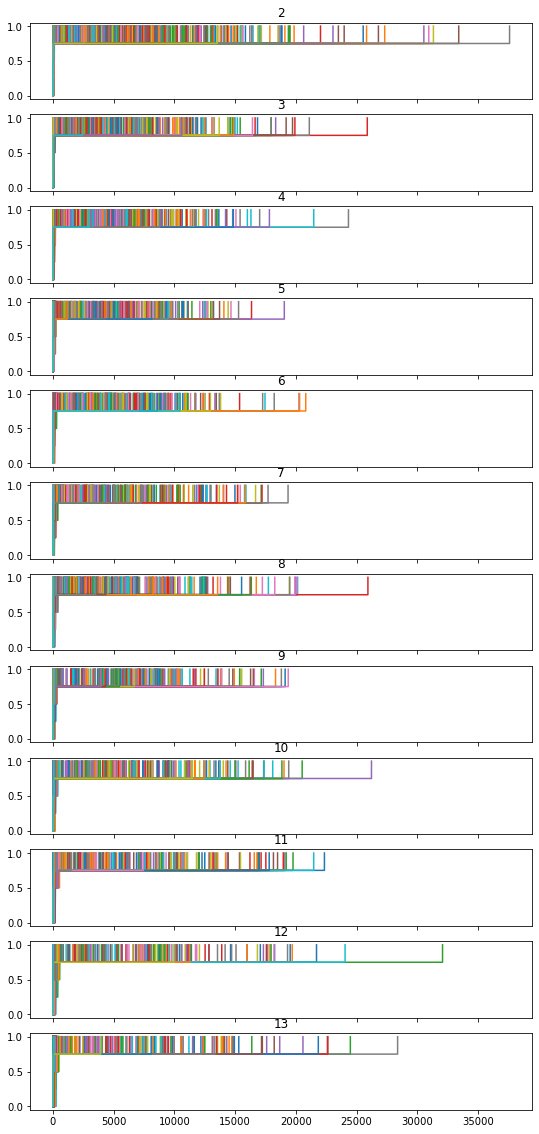

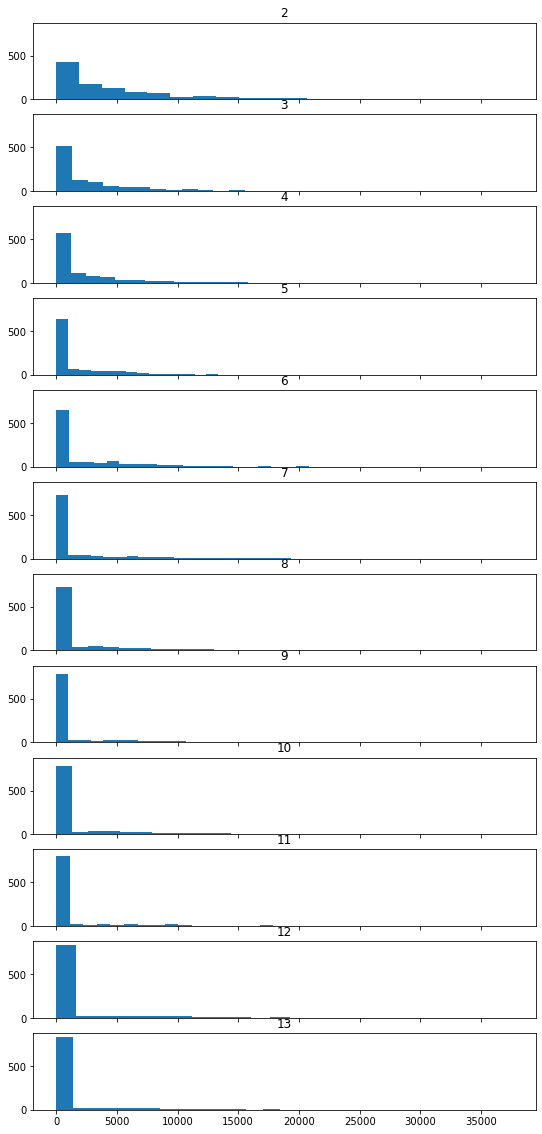

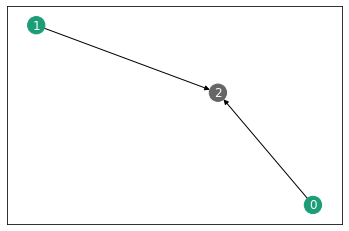

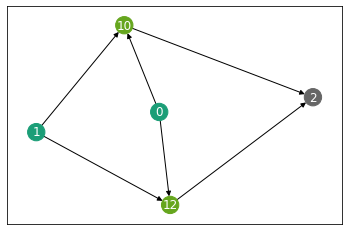

In [6]:
sizes = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
fig_trajectory, ax_trajectories = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
fig_histogram, ax_histograms = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
means = []
stds = []
isomorphism_counter = IsomorphismCounter()
for size, ax_trajectory, ax_histogram in zip(sizes, ax_trajectories, ax_histograms):
    ax_trajectory.set_title(size)
    ax_histogram.set_title(size)
    initial_circuit = Circuit(2, construct_genome(size))
    total_times = []
    print(size)
    for i in tqdm(range(1000)):
        time, circuits, fitness = run_evo(goal_function, 1000, 0.1, initial_circuit, 1000000)
        total_times.append(len(time))
        ax_trajectory.plot(fitness)
        isomorphism_counter.add(circuits[-1], size)
    total_times_array = np.array(total_times)
    means.append(total_times_array.mean())
    print("Mean:" + str(means[-1]))
    stds.append(total_times_array.std())
    print("STD:" + str(stds[-1]))
    ax_histogram.hist(total_times, 20)
fig_trajectory.savefig('trajectories.pdf', dpi=1200)
fig_histogram.savefig('histogram_fixations.pdf', dpi=1200)
plt.show()
circuits[0].plot_network(prune=True, filename='unpruned_start.pdf')
plt.show()
circuits[-1].plot_network(prune=True, filename='unpruned_end.pdf')
plt.show()

<ErrorbarContainer object of 3 artists>

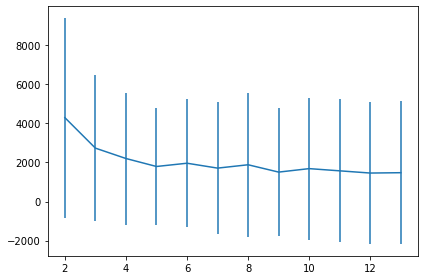

In [7]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=means, yerr=stds)

Maybe this can in some way be connected to the fact that adding more area for the binding site (more flexibility) leads to a greater chance of evolution. If I understood that correctly the other day.

Counter({'total': 4020, 2: 1000, 3: 764, 4: 520, 5: 372, 6: 314, 7: 229, 8: 214, 9: 162, 10: 132, 11: 114, 12: 102, 13: 97})


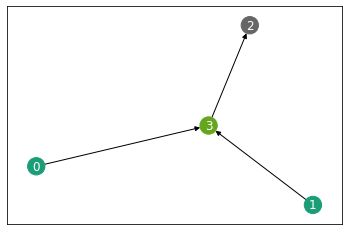

Counter({'total': 6585, 12: 773, 13: 771, 11: 752, 10: 714, 9: 684, 8: 616, 7: 615, 6: 528, 5: 502, 4: 394, 3: 236})


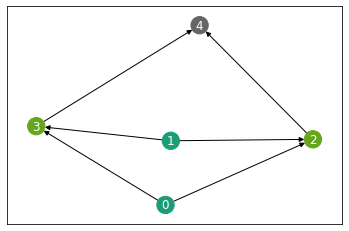

Counter({'total': 68, 4: 10, 5: 10, 10: 9, 6: 8, 8: 8, 9: 7, 7: 6, 12: 6, 11: 3, 13: 1})


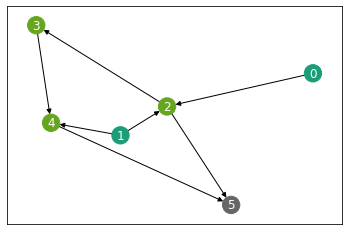

Counter({'total': 184, 4: 35, 5: 30, 6: 25, 7: 24, 8: 22, 9: 14, 10: 12, 11: 11, 12: 7, 13: 4})


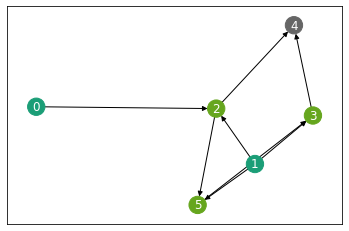

Counter({'total': 100, 5: 18, 6: 18, 7: 12, 4: 11, 10: 9, 8: 8, 11: 8, 9: 6, 13: 6, 12: 4})


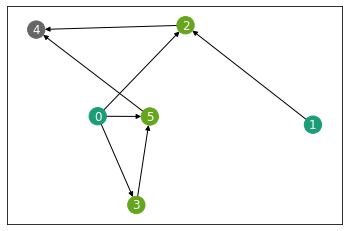

Counter({'total': 33, 6: 8, 4: 6, 8: 5, 9: 4, 5: 3, 11: 3, 7: 2, 10: 1, 13: 1})


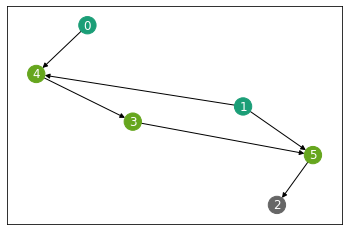

Counter({'total': 84, 6: 15, 8: 15, 4: 13, 7: 11, 5: 9, 11: 6, 10: 5, 13: 4, 9: 3, 12: 3})


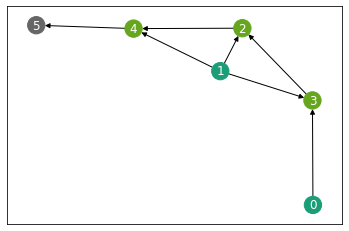

Counter({'total': 17, 5: 5, 7: 3, 8: 3, 4: 2, 9: 1, 10: 1, 11: 1, 13: 1})


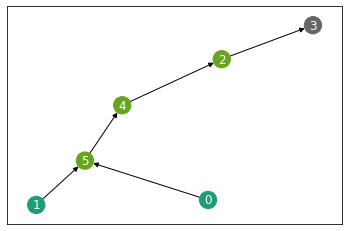

Counter({'total': 39, 7: 11, 5: 5, 6: 5, 10: 5, 8: 4, 4: 3, 9: 3, 12: 3})


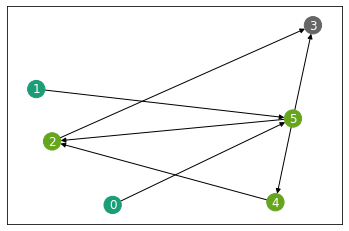

Counter({'total': 49, 5: 10, 7: 10, 6: 8, 9: 7, 8: 4, 11: 4, 10: 3, 4: 2, 13: 1})


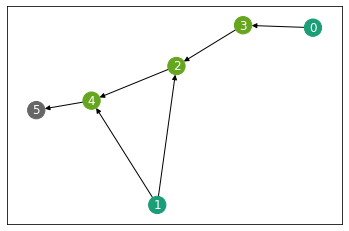

Counter({'total': 24, 7: 4, 4: 3, 5: 3, 6: 3, 10: 3, 8: 2, 9: 2, 12: 2, 13: 2})


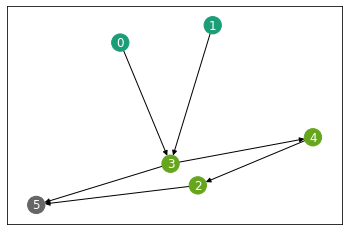

Counter({'total': 17, 8: 4, 5: 3, 6: 3, 10: 2, 12: 2, 4: 1, 9: 1, 13: 1})


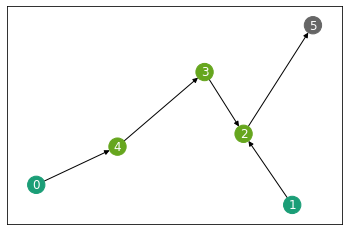

Counter({'total': 10, 9: 3, 10: 2, 13: 2, 5: 1, 6: 1, 8: 1})


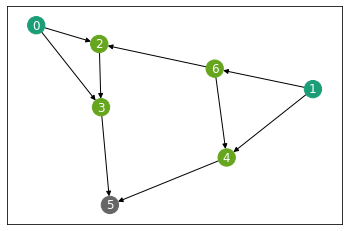

Counter({'total': 5, 5: 2, 9: 2, 8: 1})


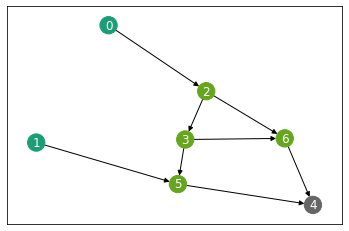

Counter({'total': 59, 11: 11, 8: 10, 10: 9, 12: 9, 13: 7, 7: 5, 5: 3, 6: 3, 9: 2})


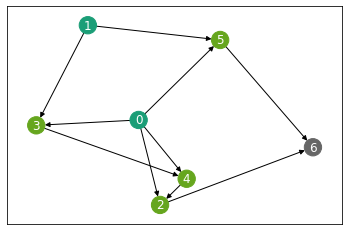

Counter({'total': 14, 6: 4, 5: 2, 9: 2, 10: 2, 13: 2, 7: 1, 12: 1})


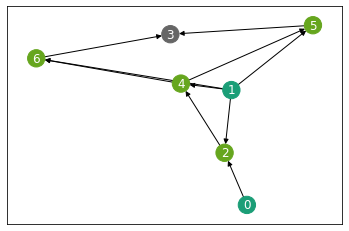

Counter({'total': 17, 9: 4, 5: 2, 6: 2, 8: 2, 12: 2, 13: 2, 7: 1, 10: 1, 11: 1})


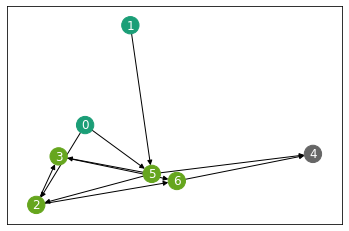

Counter({'total': 15, 5: 3, 8: 3, 7: 2, 9: 2, 10: 2, 6: 1, 11: 1, 12: 1})


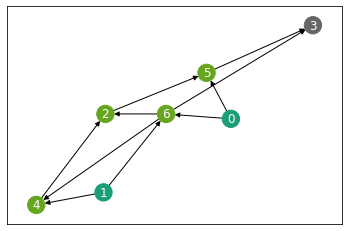

Counter({'total': 12, 10: 4, 5: 2, 6: 2, 9: 2, 8: 1, 11: 1})


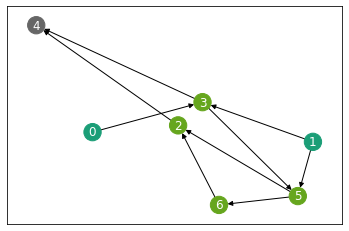

Counter({'total': 6, 8: 3, 5: 1, 6: 1, 10: 1})


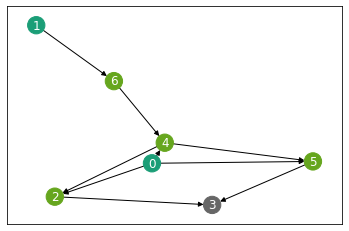

Counter({'total': 9, 7: 2, 9: 2, 5: 1, 6: 1, 8: 1, 10: 1, 13: 1})


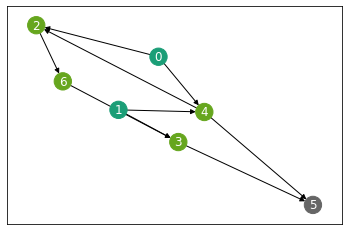

Counter({'total': 7, 6: 2, 5: 1, 7: 1, 9: 1, 11: 1, 13: 1})


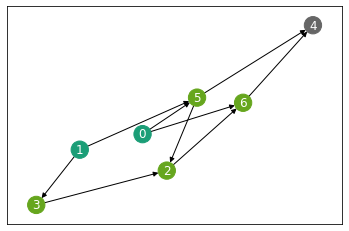

Counter({'total': 9, 6: 3, 5: 2, 13: 2, 8: 1, 9: 1})


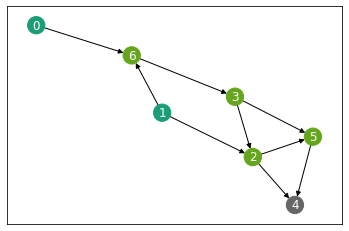

Counter({'total': 7, 13: 2, 5: 1, 6: 1, 7: 1, 10: 1, 12: 1})


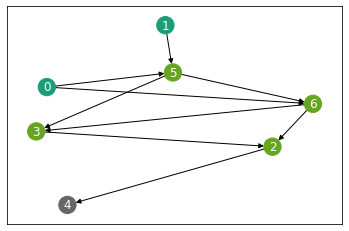

Counter({'total': 8, 6: 2, 10: 2, 12: 2, 5: 1, 13: 1})


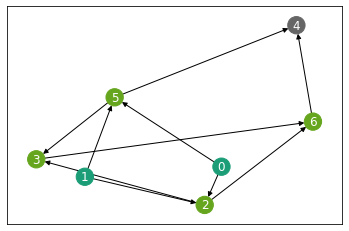

Counter({'total': 21, 6: 7, 8: 3, 10: 3, 7: 2, 9: 2, 13: 2, 5: 1, 11: 1})


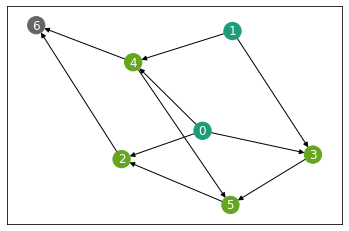

Counter({'total': 6, 8: 2, 5: 1, 9: 1, 11: 1, 12: 1})


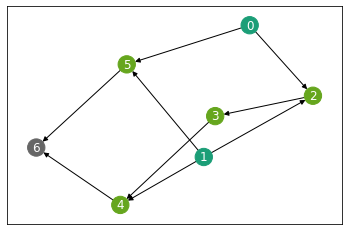

Counter({'total': 9, 6: 3, 8: 3, 7: 1, 9: 1, 12: 1})


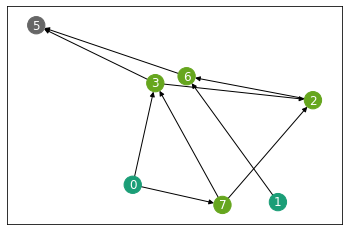

Counter({'total': 11, 6: 4, 7: 2, 8: 2, 9: 1, 10: 1, 12: 1})


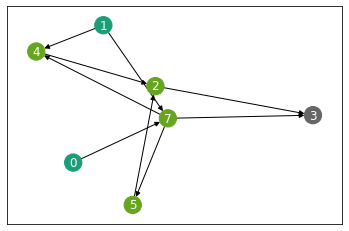

Counter({'total': 12, 10: 5, 6: 2, 8: 2, 9: 2, 11: 1})


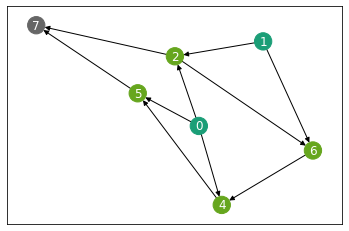

Counter({'total': 11, 6: 4, 7: 3, 9: 2, 11: 1, 13: 1})


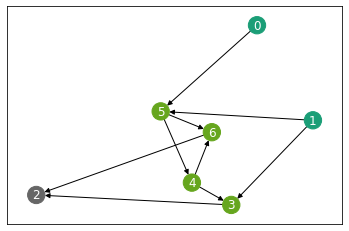

Counter({'total': 13, 8: 4, 6: 2, 10: 2, 11: 2, 12: 2, 13: 1})


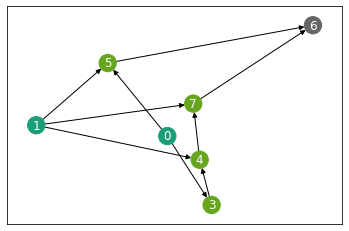

Counter({'total': 6, 8: 2, 9: 2, 7: 1, 11: 1})


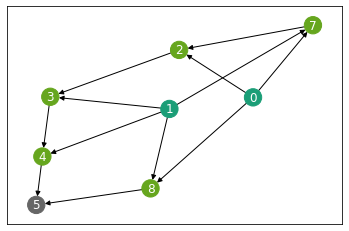

In [15]:
network_counter = isomorphism_counter.counter
for key, value in network_counter.items():
    if value['total'] > 4:
        print(value)
        key.plot_network(prune=True)
        plt.show()

In [16]:
list_unique_networks = list(isomorphism_counter.counter.keys())
list_unique_networks[:5]

[[3, 3, 1, 0, 2],
 [0, 1, 1, 0, 3, 2, 4],
 [1, 0, 2, 2, 1, 3, 2, 4, 5],
 [0, 1, 5, 1, 3, 2, 1, 2, 4],
 [1, 0, 0, 0, 2, 5, 3, 0, 4]]

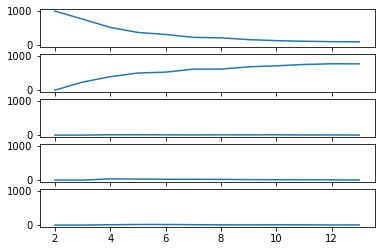

In [22]:
figs, axs = plt.subplots(5, 1, sharex=True, sharey=True)
for ax, network in zip(axs, list_unique_networks[:5]):
    ax.plot(sizes, [isomorphism_counter.get_number_by_size(size)[network] for size in sizes])